In [202]:
import ROOT

In [203]:
from tools.sample import Sample

In [204]:
Fake = Sample('Fake', 'grey', 'Fake')

In [205]:
Fake

In [206]:
help(Fake)

Help on Sample in module tools.sample object:

class Sample(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, name, color, title, sub_samples=None)
 |  
 |  __str__(self)
 |  
 |  hist(self, rfile, cat, name='nominal')
 |  
 |  hist_one_cat(self, rfile, cat, hist_name)
 |  
 |  systematics(self, cat, rfile)
 |  
 |  yields(self, rfile, cat, name='nominal')
 |  
 |  yields_systs(self, rfile, cat, sym=True)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  color
 |  
 |  name
 |  
 |  title



In [207]:
from rootpy.io import root_open
rfile = root_open('/Users/quentin/workspaces_input/ichep_2016/hhAll_WSinput_wFakeUnc.root')

In [208]:
rfile.ls()


TFile**		/Users/quentin/workspaces_input/ichep_2016/hhAll_WSinput_wFakeUnc.root	
 TFile*		/Users/quentin/workspaces_input/ichep_2016/hhAll_WSinput_wFakeUnc.root	
  KEY: TDirectoryFile	hhAll_QCD_fit;1	hhAll_QCD_fit
  KEY: TDirectoryFile	hhAll_preselection;1	hhAll_preselection
  KEY: TDirectoryFile	hhAll_CBA_vbf;1	hhAll_CBA_vbf
  KEY: TDirectoryFile	hhAll_vbf_lowdr;1	hhAll_vbf_lowdr
  KEY: TDirectoryFile	hhAll_vbf_highdr_tight;1	hhAll_vbf_highdr_tight
  KEY: TDirectoryFile	hhAll_vbf_highdr_loose;1	hhAll_vbf_highdr_loose
  KEY: TDirectoryFile	hhAll_CBA_boost;1	hhAll_CBA_boost
  KEY: TDirectoryFile	hhAll_boost_tight;1	hhAll_boost_tight
  KEY: TDirectoryFile	hhAll_boost_loose;1	hhAll_boost_loose


In [209]:
cat = 'hhAll_CBA_boost'
systs = Fake.systematics(cat, rfile)
#systs

In [210]:
#rfile['CBA_boost']


In [211]:
h_nom = Fake.hist(rfile, cat)

In [212]:
syst_fake_high = filter(lambda t: 'fake' in t, systs[0])
syst_fake_low  = filter(lambda t: 'fake' in t, systs[1])

In [213]:
syst_fake_high

['hh_fake_extrapolation_high', 'hh_fake_contamination_high']

In [214]:
syst_fake_low

['hh_fake_extrapolation_low', 'hh_fake_contamination_low']

In [215]:
hists_high = []
for s in syst_fake_high:
    h = Fake.hist(rfile, cat, name=s)
    hists_high.append(h)
print hists_high

[Hist('hh_fake_extrapolation_high'), Hist('hh_fake_contamination_high')]


In [216]:
hists_low = []
for s in syst_fake_low:
    h = Fake.hist(rfile, cat, name=s)
    hists_low.append(h)
print hists_low

[Hist('hh_fake_extrapolation_low'), Hist('hh_fake_contamination_low')]


In [217]:
from tools.fancy import syst_envelop, envelop
band = envelop(h_nom, hists_low, hists_high)
band_0 = envelop(h_nom, hists_low[0], hists_high[0])

2
1


INFO:rootpy.plotting.style:using ROOT style 'ATLAS(shape=rect)'


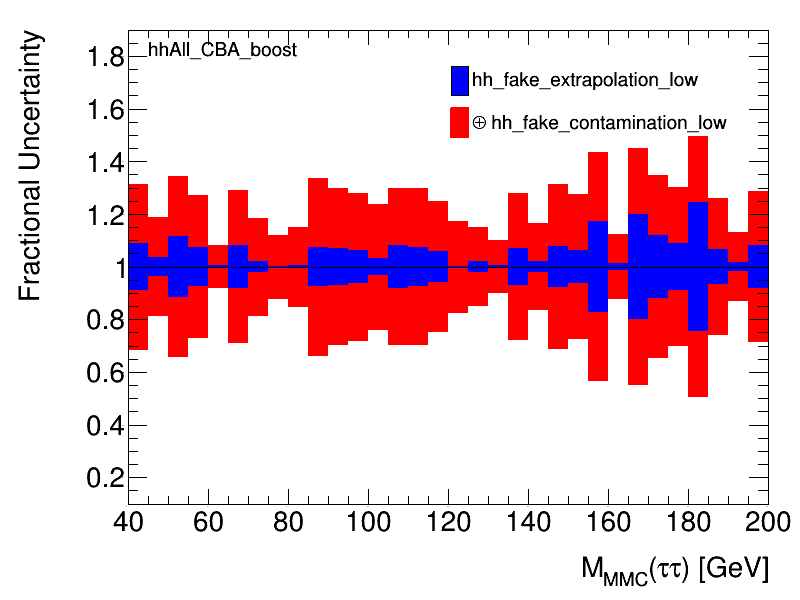

In [218]:
from rootpy.plotting import set_style, Canvas, Hist, Legend
set_style('ATLAS', shape='rect')
c = Canvas()
h = Hist(10, 40, 200)
for b in h:
    b.value = 1
h.yaxis.SetRangeUser(0.1, 1.9)
h.xaxis.title = h_nom.xaxis.title
h.yaxis.title = 'Fractional Uncertainty'

cat_label = ROOT.TText(45, 1.8, cat)
cat_label.SetTextSize(20)
h.Draw('HIST')
band.color = 'red'
band.fillstyle = 'solid'
#band.linecolor = 'black'
band.linewidth = 2
band.legendstyle = 'f'
band.Draw('sameE2')
band.title = '#oplus {0}'.format(hists_low[-1].name)
band_0.fillcolor = 'blue'
band_0.fillstyle = 'solid'
band_0.legendstyle = 'f'
band_0.title = '{0}'.format(hists_low[0].name)
band_0.Draw('sameE2')
#low.color = 'red'
#low.Draw('SAMEHIST')
h.Draw('same')
cat_label.Draw()
leg = Legend([band_0, band], pad=c, textsize=20, rightmargin=0.4)
leg.Draw()
c.RedrawAxis()
c.SaveAs('plots/fractional_fake_uncert_{0}.pdf'.format(cat))
c